<a href="https://colab.research.google.com/github/Mj-Novoa/Challenge_TelecomX_PARTE1/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Telecom X – Análisis de Evasión de Clientes

Este proyecto busca analizar los factores que influyen en la cancelación de clientes (*churn*) en Telecom X.  
A partir del análisis de datos, se identificarán patrones y métricas clave para apoyar estrategias de retención.


#📌 Extracción

✅ Cargar los datos directamente desde la API utilizando Python.  
✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.  
✅ Guardar una copia de seguridad en formato `.csv` o `.parquet` para reutilizar.  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# conectar a Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Rutas Drive
path = '/content/drive/MyDrive/archivo alura latam/TelecomX_Data.json'

datos = pd.read_json(path)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
# traer las columnas

columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

#🔧 Transformación

✅ Normalizar nombres de columnas (snake_case).  
✅ Manejar valores nulos y duplicados.  
✅ Convertir tipos de datos (fechas, numéricos, categóricos).  
✅ Crear variables derivadas:  
   - `churn`: etiqueta de cancelación (1 = cancelado, 0 = activo).  
   - `tenure_days`: antigüedad del cliente en días.  
   - `arpu`: ingreso promedio mensual.  


In [ ]:
# normalizar customer, phone, internet y account
customer_normalizado = pd.json_normalize(datos['customer'])
phone_normalizado = pd.json_normalize(datos['phone'])
internet_normalizado = pd.json_normalize(datos['internet'])
account_normalizado = pd.json_normalize(datos['account'])

In [ ]:
# hacer join entre el dataframe original y las columnas normalizadas
datos = datos.drop(columns=['customer']).join(customer_normalizado)
datos = datos.drop(columns=['phone']).join(phone_normalizado)
datos = datos.drop(columns=['internet']).join(internet_normalizado)
datos = datos.drop(columns=['account']).join(account_normalizado)


In [ ]:
columnas_norm = list(datos.columns)
columnas_norm

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# Intentar convertir la columna a float y capturar errores
try:
    datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)
    print("Conversión exitosa a float.")
except ValueError as e:
    print("Error en la conversión: ", e)

Error en la conversión:  could not convert string to float: ' '


In [ ]:
# Reemplazar cadenas vacías y espacios en blanco con NaN
datos['Charges.Total'] = datos['Charges.Total'].replace(['', ' '], np.nan)

In [ ]:
# Intentar nuevamente convertir a float la columna
try:
    datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)
    print("Conversión exitosa a float.")
except ValueError as e:
    print("Error en la conversión: ", e)

Conversión exitosa a float.


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# validar null o vacíos en columna "Churn" (Se encontró inconsistencias en tareas futuras)
hay_cadenas_vacias = (datos['Churn'].str.len() == 0).any()
if hay_cadenas_vacias:
    print("La columna 'churn' contiene cadenas vacías.")
else:
    print("La columna 'churn' no contiene cadenas vacías.")

churn_vacias = (datos['Churn'] == '').sum()
churn_vacias

La columna 'churn' contiene cadenas vacías.


np.int64(224)

In [ ]:
# Reemplazar cadenas vacías en la columna "Churn" por "No Info" usando .loc
datos.loc[datos['Churn'] == '', 'Churn'] = 'No Info'

In [ ]:
# validamos los valores de la columna "Churn"
frecuencia_churn = datos['Churn'].value_counts()
print(frecuencia_churn)

Churn
No         5174
Yes        1869
No Info     224
Name: count, dtype: int64


In [ ]:
# La columna Charges.Total tiene valores NaN que hay que corregir
# para esto usaremos una función que validará la posición del valor NaN y hara un promedio entre el valor anterior y el siguiente,
# en caso de no tener valor anterior o siguiente (al inicio o fin) repetirá el valor anterior o siguiente según corresponda
def calcular_mean(index, series):
    valores = []
    if index > 0:  # Si no es el primer elemento, agrega el anterior
        valores.append(series[index - 1])
    if index < len(series) - 1:  # Si no es el último elemento, agrega el siguiente
        valores.append(series[index + 1])
    if valores:  # Si hay valores, calcula el promedio
        return np.mean(valores)
    return np.nan  # Si no hay valores, devuelve NaN


In [ ]:
# calcula un promedio entre los valores de la columna "Charges.Total"
mean_value = datos['Charges.Total'].mean()
# busca valores null en la columna "Charges.total" y los reemplaza por el promedio almacenado en la variable mean_value
datos['Charges.Total'] = datos['Charges.Total'].fillna(mean_value)

In [ ]:
def validar_nan(columna):
  num_nan = datos[columna].isna().sum()
  return num_nan

In [ ]:
# validar columnas con NaN
nan_ct = validar_nan('Charges.Total')
print(f"Número de valores NaN en 'Charges.Total': {nan_ct}")
nan_cm = validar_nan('Charges.Monthly')
print(f"Número de valores NaN en 'Charges.Monthly': {nan_cm}")
nan_ter = validar_nan('tenure')
print(f"Número de valores NaN en 'tenure': {nan_ter}")
nan_scz = validar_nan('SeniorCitizen')
print(f"Número de valores NaN en 'SeniorCitizen': {nan_scz}")

Número de valores NaN en 'Charges.Total': 0
Número de valores NaN en 'Charges.Monthly': 0
Número de valores NaN en 'tenure': 0
Número de valores NaN en 'SeniorCitizen': 0


In [ ]:
columnas_normalizadas = list(datos.columns)
columnas_normalizadas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [ ]:
# Ahora que no tenemos columnas vacías o con valores '' crearemos la nueva columna
# llamada "Cuentas_Diarias"
datos['Cuentas_Diarias'] = datos['Charges.Total'] / 30

In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


#📊 Carga y análisis

✅ Almacenar los datos procesados en un DataFrame limpio.  
✅ Exportar a un archivo `.csv` para posteriores análisis o modelos predictivos.  


## **1. Evasión Total**

Se realizará un análisis breve para mostrar graficar la problemática de la evasión que tiene la empresa

In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [ ]:
# extraemos las columnas que necesitamos para el análisis
datos_churn = datos['Churn']
datos_churn.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB


In [ ]:
# Convertir la Series a DataFrame con nombre de columna explícito
df_datos_churn = datos_churn.to_frame(name='Churn')

In [ ]:
df_datos_churn['Churn']

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [ ]:
# Contar el total de cada valor 'yes' y 'no'
churn_total = df_datos_churn['Churn'].value_counts()
churn_total

,count
Churn,
No,5174
Yes,1869
No Info,224


In [ ]:
# Convertir la Series a DataFrame con nombre de columna explícito
df_churn_total = churn_total.to_frame(name='Total').reset_index()
df_churn_total

,Churn,Total
0,No,5174
1,Yes,1869
2,No Info,224


In [ ]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.barplot(data=df_churn_total, x=df_churn_total['Total'], y=df_churn_total['Churn'], hue=df_churn_total.index, orient='h', palette=palette, legend=False)
  ax.set_title('Cantidad de Clientes Perdidos',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i,j in enumerate(df_churn_total['Total']):
    ax.text(j+20, i, str(j), color = 'black', fontsize=9, ha='left', va='center')

plt.show()


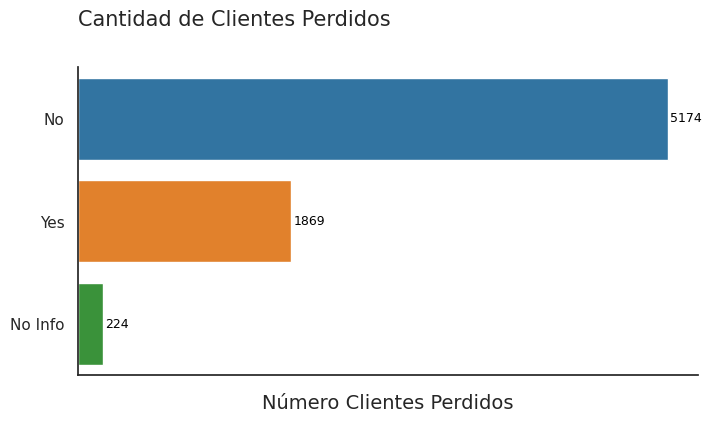

In [ ]:
sns.set_theme(style='white')
generar_grafico('tab10')

## **2. Contratos y Fidelización**

Se realizará un análisis para evaluar la fidelización que logra la empresa dependiendo del tipo de contrato de cada persona.

In [ ]:
datos_fidelizacion = datos[['Churn', 'Contract', 'tenure']]
datos_fidelizacion

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
2,Yes,Month-to-month,4
3,Yes,Month-to-month,13
4,Yes,Month-to-month,3
...,...,...,...
7262,No,One year,13
7263,Yes,Month-to-month,22
7264,No,Month-to-month,2
7265,No,Two year,67


### **Tipo Contrato Clientes Perdidos**

In [ ]:
datos_fidelizacion_out = datos_fidelizacion[datos_fidelizacion['Churn'] == 'Yes']
datos_fidelizacion_out

,Churn,Contract,tenure
2,Yes,Month-to-month,4
3,Yes,Month-to-month,13
4,Yes,Month-to-month,3
18,Yes,One year,45
19,Yes,Month-to-month,1
...,...,...,...
7243,Yes,Month-to-month,21
7246,Yes,Month-to-month,9
7260,Yes,Month-to-month,1
7261,Yes,Month-to-month,4


In [ ]:
# resetear indice DF de la gente que abandonó la compañía
datos_fidelizacion_out.reset_index(inplace=True, drop=True)
datos_fidelizacion_out

,Churn,Contract,tenure
0,Yes,Month-to-month,4
1,Yes,Month-to-month,13
2,Yes,Month-to-month,3
3,Yes,One year,45
4,Yes,Month-to-month,1
...,...,...,...
1864,Yes,Month-to-month,21
1865,Yes,Month-to-month,9
1866,Yes,Month-to-month,1
1867,Yes,Month-to-month,4


In [ ]:
# Contar la frecuencia de cada valor en la columna 'Contract'
frecuencia_valores = datos_fidelizacion_out['Contract'].value_counts()
print(frecuencia_valores)

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


In [ ]:
total_mtm = (datos_fidelizacion_out['Contract'] == 'Month-to-month').sum()
total_year = (datos_fidelizacion_out['Contract'] == 'One year').sum()
total_ty = (datos_fidelizacion_out['Contract'] == 'Two year').sum()

In [ ]:
# crear dataframe
fidelizacion = {
    'Tipo de Contrato': ['Month-to-month', 'One year', 'Two year'],
    'Total': [total_mtm, total_year, total_ty]
}
df_fidelizacion = pd.DataFrame(fidelizacion)
df_fidelizacion

,Tipo de Contrato,Total
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [ ]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.barplot(data=df_fidelizacion, x=df_fidelizacion['Total'], y=df_fidelizacion['Tipo de Contrato'], hue=df_fidelizacion.index, orient='h', palette=palette, legend=False)
  ax.set_title('Cantidad de Clientes Perdidos según el Tipo de Contrato',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i,j in enumerate(df_fidelizacion['Total']):
    ax.text(j+20, i, str(j), color = 'black', fontsize=9, ha='left', va='center')

plt.show()


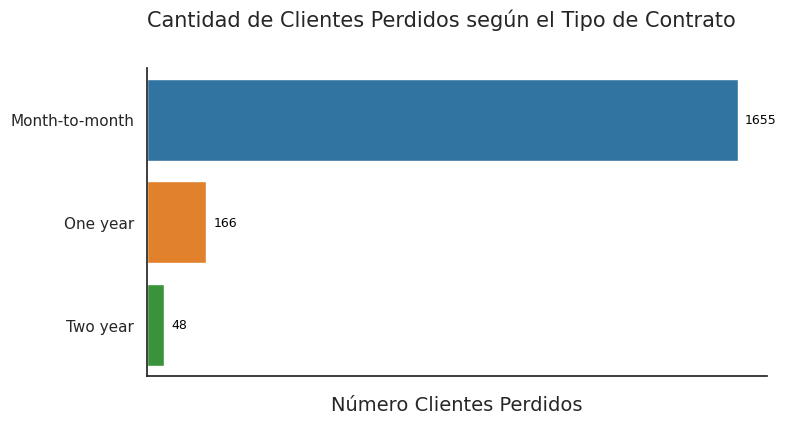

In [ ]:
sns.set_theme(style='white')
generar_grafico('tab10')

In [ ]:
columnas_fidelizados = list(df_fidelizacion.columns)
columnas_fidelizados

['Tipo de Contrato', 'Total']

### **Tipo Contrato Clientes Fidelizados**

In [ ]:
# traer clientes fidelizados
datos_fidelizacion_in = datos_fidelizacion[datos_fidelizacion['Churn'] == 'No']
datos_fidelizacion_in

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
5,No,Month-to-month,9
6,No,Two year,71
7,No,Two year,63
...,...,...,...
7259,No,One year,7
7262,No,One year,13
7264,No,Month-to-month,2
7265,No,Two year,67


In [ ]:
# resetear indice DF de la gente que abandonó la compañía
datos_fidelizacion_in.reset_index(inplace=True, drop=True)
datos_fidelizacion_in

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
2,No,Month-to-month,9
3,No,Two year,71
4,No,Two year,63
...,...,...,...
5169,No,One year,7
5170,No,One year,13
5171,No,Month-to-month,2
5172,No,Two year,67


In [ ]:
# Contar la frecuencia de cada valor en la columna 'Contract'
frecuencia_valores_in = datos_fidelizacion_in['Contract'].value_counts()
print(frecuencia_valores_in)

Contract
Month-to-month    2220
Two year          1647
One year          1307
Name: count, dtype: int64


In [ ]:
total_mtm_in = (datos_fidelizacion_in['Contract'] == 'Month-to-month').sum()
total_year_in = (datos_fidelizacion_in['Contract'] == 'One year').sum()
total_ty_in = (datos_fidelizacion_in['Contract'] == 'Two year').sum()

In [ ]:
# crear dataframe
fidelizacion_in = {
    'Tipo de Contrato': ['Month-to-month', 'One year', 'Two year'],
    'Total': [total_mtm_in, total_year_in, total_ty_in]
}
df_fidelizacion_in = pd.DataFrame(fidelizacion_in)
df_fidelizacion_in

,Tipo de Contrato,Total
0,Month-to-month,2220
1,One year,1307
2,Two year,1647


In [ ]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.barplot(data=df_fidelizacion_in, x=df_fidelizacion_in['Total'], y=df_fidelizacion_in['Tipo de Contrato'], hue=df_fidelizacion_in.index, orient='h', palette=palette, legend=False)
  ax.set_title('Cantidad de Clientes Fidelizados según el Tipo de Contrato',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Fidelizados', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i,j in enumerate(df_fidelizacion_in['Total']):
    ax.text(j+20, i, str(j), color = 'black', fontsize=9, ha='left', va='center')

plt.show()

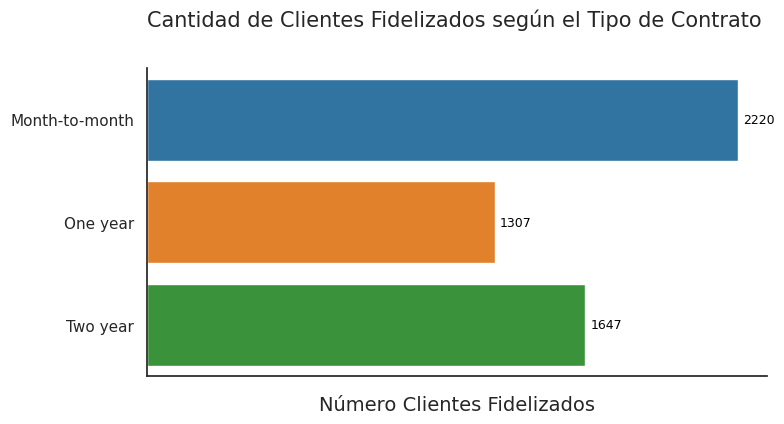

In [ ]:
sns.set_theme(style='white')
generar_grafico('tab10')

### **Análisis Combinado**

In [ ]:
# Combinar los dos DataFrames
df_fid_vs_nofid = df_fidelizacion
df_fid_vs_nofid

,Tipo de Contrato,Total
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [ ]:
# Renombrar columna Total
df_fid_vs_nofid = df_fid_vs_nofid.rename(columns={'Total': 'No_Fidelizados'})
df_fid_vs_nofid

,Tipo de Contrato,No_Fidelizados
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [ ]:
# agregar columna total fidelizados
df_fid_vs_nofid['Fidelizados'] = df_fidelizacion_in['Total']
df_fid_vs_nofid

,Tipo de Contrato,No_Fidelizados,Fidelizados
0,Month-to-month,1655,2220
1,One year,166,1307
2,Two year,48,1647


In [ ]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

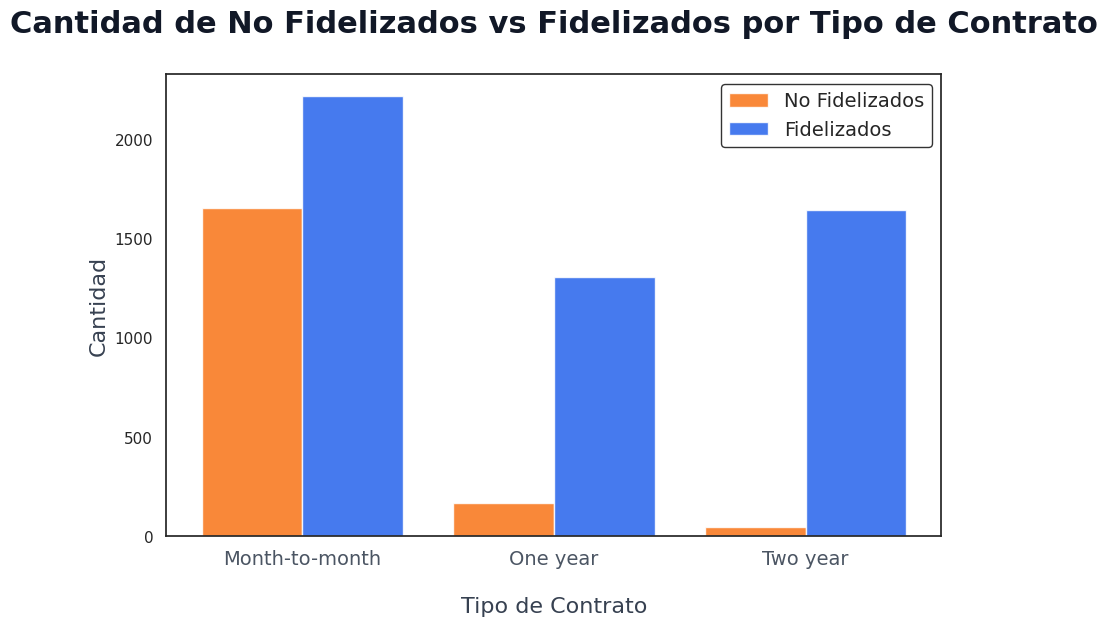

In [ ]:
# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
x = np.arange(len(df_fid_vs_nofid['Tipo de Contrato']))
bar_width = 0.4
color_no_fid = '#f97316'  # naranja suave
color_fid = '#2563eb'     # azul suave
bars_no_fid = ax.bar(x - bar_width/2, df_fid_vs_nofid['No_Fidelizados'], width=bar_width,
                     label='No Fidelizados', color=color_no_fid, alpha=0.85)
bars_fid = ax.bar(x + bar_width/2, df_fid_vs_nofid['Fidelizados'], width=bar_width,
                  label='Fidelizados', color=color_fid, alpha=0.85)
ax.set_title('Cantidad de No Fidelizados vs Fidelizados por Tipo de Contrato', fontsize=22, weight='bold', color='#111827', pad=30)
ax.set_xlabel('Tipo de Contrato', fontsize=16, color='#374151', labelpad=20)
ax.set_ylabel('Cantidad', fontsize=16, color='#374151')
# Etiquetas eje X centradas en cada grupo (par de barras)
ax.set_xticks(x)
ax.set_xticklabels(df_fid_vs_nofid['Tipo de Contrato'], fontsize=14, color='#4b5563')
# Leyenda
ax.legend(loc='upper right', fontsize=14, frameon=True, facecolor='white', edgecolor='black');


## **3. Soporte Técnico**

Se realizará un análisis de la influencia del Soporte Técnico a la hora de fidelizar a los clientes.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [ ]:
# extraemos las columnas que necesitamos para el análisis
datos_soporte = datos[['Churn', 'InternetService', 'TechSupport']]
datos_soporte

,Churn,InternetService,TechSupport
0,No,DSL,Yes
1,No,DSL,No
2,Yes,Fiber optic,No
3,Yes,Fiber optic,No
4,Yes,Fiber optic,Yes
...,...,...,...
7262,No,DSL,Yes
7263,Yes,Fiber optic,No
7264,No,DSL,No
7265,No,DSL,Yes


### **Soporte No Fidelizados**

In [ ]:
datos_soporte_out = datos_soporte[datos_soporte['Churn'] == 'Yes']
datos_soporte_out

,Churn,InternetService,TechSupport
2,Yes,Fiber optic,No
3,Yes,Fiber optic,No
4,Yes,Fiber optic,Yes
18,Yes,DSL,No
19,Yes,DSL,No
...,...,...,...
7243,Yes,Fiber optic,No
7246,Yes,Fiber optic,No
7260,Yes,Fiber optic,No
7261,Yes,No,No internet service


In [ ]:
# resetear indice DF de la gente que abandonó la compañía
datos_soporte_out.reset_index(inplace=True, drop=True)
datos_soporte_out

,Churn,InternetService,TechSupport
0,Yes,Fiber optic,No
1,Yes,Fiber optic,No
2,Yes,Fiber optic,Yes
3,Yes,DSL,No
4,Yes,DSL,No
...,...,...,...
1864,Yes,Fiber optic,No
1865,Yes,Fiber optic,No
1866,Yes,Fiber optic,No
1867,Yes,No,No internet service


In [ ]:
# Contar la frecuencia de cada valor en la columna 'InternetService'
frecuencia_valores_soporte = datos_soporte_out['InternetService'].value_counts()
frecuencia_valores_soporte.info()

<class 'pandas.core.series.Series'>
Index: 3 entries, Fiber optic to No
Series name: count
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [ ]:
# Verifica las columnas del DataFrame
print(datos_soporte_out.columns)

Index(['Churn', 'InternetService', 'TechSupport'], dtype='object')


In [ ]:
total_fo_ns = ((datos_soporte_out['InternetService'] == 'Fiber optic') & (datos_soporte_out['TechSupport'] == 'No') ).sum()
total_fo_ws = ((datos_soporte_out['InternetService'] == 'Fiber optic') & (datos_soporte_out['TechSupport'] == 'Yes')).sum()
total_dsl_ns = ((datos_soporte_out['InternetService'] == 'DSL') & (datos_soporte_out['TechSupport'] == 'No')).sum()
total_dsl_ws = ((datos_soporte_out['InternetService'] == 'DSL') & (datos_soporte_out['TechSupport'] == 'Yes')).sum()
total_no_ns = ((datos_soporte_out['InternetService'] == 'No') & (datos_soporte_out['TechSupport'] == 'No')).sum()

In [ ]:
total_fo_ns, total_fo_ws, total_dsl_ns, total_dsl_ws, total_no_ns

(np.int64(1101), np.int64(196), np.int64(345), np.int64(114), np.int64(0))

In [ ]:
# crear dataframe
soporte_tecnico = {
    'Servicio': ['Fiber Optic (N.S)', 'Fiber Optic (W.S)', 'DSL (N.S)', 'DSL (W.S)', 'No Service'],
    'Total': [total_fo_ns, total_fo_ws, total_dsl_ns, total_dsl_ws, total_no_ns]
}
df_soporte_tecnico = pd.DataFrame(soporte_tecnico)
df_soporte_tecnico

,Servicio,Total
0,Fiber Optic (N.S),1101
1,Fiber Optic (W.S),196
2,DSL (N.S),345
3,DSL (W.S),114
4,No Service,0


In [ ]:
df_soporte_tecnico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Servicio  5 non-null      object
 1   Total     5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [ ]:
df_soporte_tecnico['Servicio']

,Servicio
0,Fiber Optic (N.S)
1,Fiber Optic (W.S)
2,DSL (N.S)
3,DSL (W.S)
4,No Service


In [ ]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

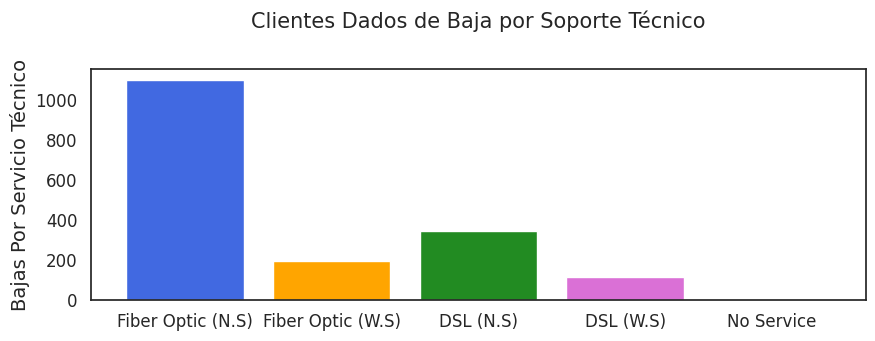

In [ ]:
# Plot del resultado
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(df_soporte_tecnico['Servicio'], df_soporte_tecnico['Total'], color=colores)
ax.set_title('Clientes Dados de Baja por Soporte Técnico', loc='center', fontsize=15, pad=30)
ax.set_xlabel('')
ax.set_ylabel('Bajas Por Servicio Técnico', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

### **Soporte Fidelizados**

In [ ]:
datos_soporte_in = datos_soporte[datos_soporte['Churn'] == 'No']
datos_soporte_in

,Churn,InternetService,TechSupport
0,No,DSL,Yes
1,No,DSL,No
5,No,DSL,Yes
6,No,Fiber optic,Yes
7,No,Fiber optic,Yes
...,...,...,...
7259,No,Fiber optic,No
7262,No,DSL,Yes
7264,No,DSL,No
7265,No,DSL,Yes


In [ ]:
# resetear indice DF de la gente que abandonó la compañía
datos_soporte_in.reset_index(inplace=True, drop=True)
datos_soporte_in

,Churn,InternetService,TechSupport
0,No,DSL,Yes
1,No,DSL,No
2,No,DSL,Yes
3,No,Fiber optic,Yes
4,No,Fiber optic,Yes
...,...,...,...
5169,No,Fiber optic,No
5170,No,DSL,Yes
5171,No,DSL,No
5172,No,DSL,Yes


In [ ]:
# Contar la frecuencia de cada valor en la columna 'InternetService'
frecuencia_valores_soporte_in = datos_soporte_in['InternetService'].value_counts()
frecuencia_valores_soporte_in

,count
InternetService,
DSL,1962
Fiber optic,1799
No,1413


In [ ]:
# Verifica las columnas del DataFrame
print(datos_soporte_in.columns)

Index(['Churn', 'InternetService', 'TechSupport'], dtype='object')


In [ ]:
total_fo_ns_in = ((datos_soporte_in['InternetService'] == 'Fiber optic') & (datos_soporte_in['TechSupport'] == 'No') ).sum()
total_fo_ws_in = ((datos_soporte_in['InternetService'] == 'Fiber optic') & (datos_soporte_in['TechSupport'] == 'Yes')).sum()
total_dsl_ns_in = ((datos_soporte_in['InternetService'] == 'DSL') & (datos_soporte_in['TechSupport'] == 'No')).sum()
total_dsl_ws_in = ((datos_soporte_in['InternetService'] == 'DSL') & (datos_soporte_in['TechSupport'] == 'Yes')).sum()
total_no_ns_in = ((datos_soporte_in['InternetService'] == 'No') & (datos_soporte_in['TechSupport'] == 'No')).sum()

In [ ]:
# crear dataframe
soporte_tecnico_in = {
    'Servicio': ['Fiber Optic (N.S)', 'Fiber Optic (W.S)', 'DSL (N.S)', 'DSL (W.S)', 'No Service'],
    'Total': [total_fo_ns_in, total_fo_ws_in, total_dsl_ns_in, total_dsl_ws_in, total_no_ns_in]
}
df_soporte_tecnico_in = pd.DataFrame(soporte_tecnico_in)
df_soporte_tecnico_in

,Servicio,Total
0,Fiber Optic (N.S),1129
1,Fiber Optic (W.S),670
2,DSL (N.S),898
3,DSL (W.S),1064
4,No Service,0


In [ ]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

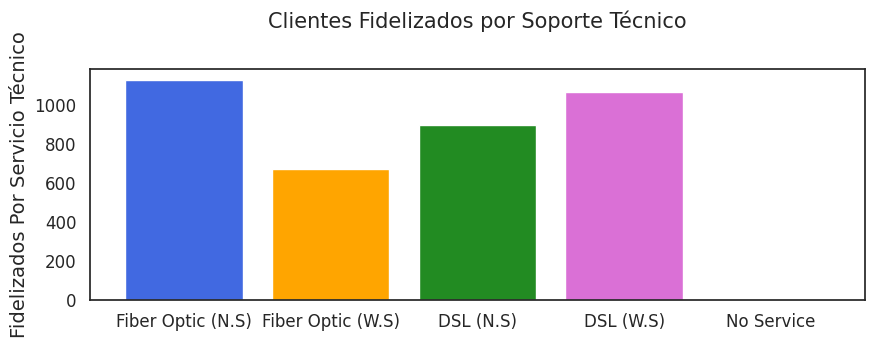

In [ ]:
# Plot del resultado
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(df_soporte_tecnico_in['Servicio'], df_soporte_tecnico_in['Total'], color=colores)
ax.set_title('Clientes Fidelizados por Soporte Técnico', loc='center', fontsize=15, pad=30)
ax.set_xlabel('')
ax.set_ylabel('Fidelizados Por Servicio Técnico', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

### **Análisis Combinado**

In [ ]:
# Combinar los dos DataFrames
df_sup_fid_vs_nofid = df_soporte_tecnico_in
df_sup_fid_vs_nofid

,Servicio,Total
0,Fiber Optic (N.S),1129
1,Fiber Optic (W.S),670
2,DSL (N.S),898
3,DSL (W.S),1064
4,No Service,0


In [ ]:
# Renombrar columna Total
df_sup_fid_vs_nofid = df_sup_fid_vs_nofid.rename(columns={'Total': 'Fidelizados'})
df_sup_fid_vs_nofid

,Servicio,Fidelizados
0,Fiber Optic (N.S),1129
1,Fiber Optic (W.S),670
2,DSL (N.S),898
3,DSL (W.S),1064
4,No Service,0


In [ ]:
# agregar columna total fidelizados
df_sup_fid_vs_nofid['No_Fidelizados'] = df_soporte_tecnico['Total']
df_sup_fid_vs_nofid

,Servicio,Fidelizados,No_Fidelizados
0,Fiber Optic (N.S),1129,1101
1,Fiber Optic (W.S),670,196
2,DSL (N.S),898,345
3,DSL (W.S),1064,114
4,No Service,0,0


In [ ]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

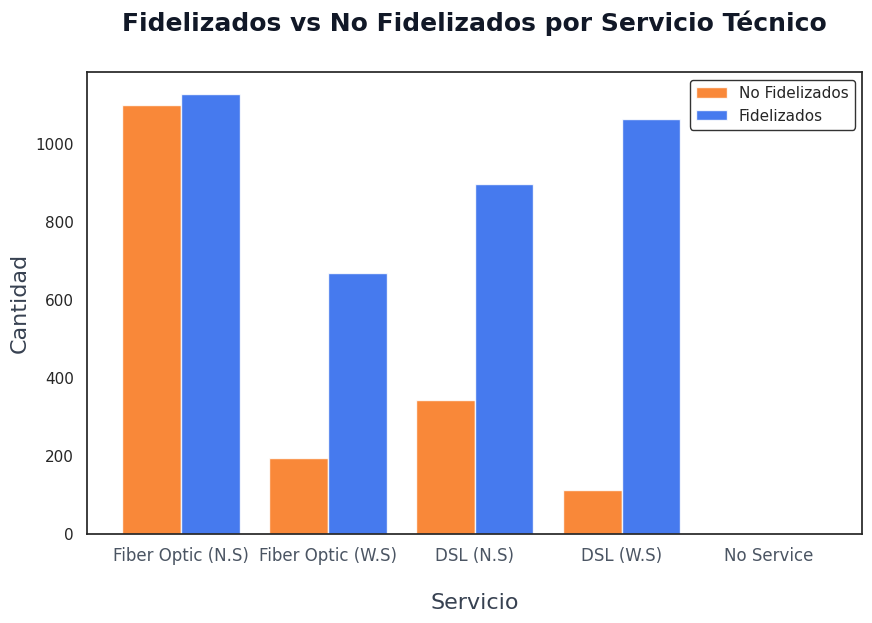

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
x = np.arange(len(df_sup_fid_vs_nofid['Servicio']))
bar_width = 0.4
color_no_fid = '#f97316'  # naranja suave
color_fid = '#2563eb'     # azul suave

bars_no_fid = ax.bar(x - bar_width/2, df_sup_fid_vs_nofid['No_Fidelizados'], width=bar_width,
                     label='No Fidelizados', color=color_no_fid, alpha=0.85)
bars_fid = ax.bar(x + bar_width/2, df_sup_fid_vs_nofid['Fidelizados'], width=bar_width,
                  label='Fidelizados', color=color_fid, alpha=0.85)

ax.set_title('Fidelizados vs No Fidelizados por Servicio Técnico', fontsize=18, weight='bold', color='#111827', pad=30)
ax.set_xlabel('Servicio', fontsize=16, color='#374151', labelpad=20)
ax.set_ylabel('Cantidad', fontsize=16, color='#374151')

ax.set_xticks(x)
ax.set_xticklabels(df_sup_fid_vs_nofid['Servicio'], fontsize=12, color='#4b5563')

ax.legend(loc='upper right', fontsize=11, frameon=True, facecolor='white', edgecolor='black')

plt.show()

## **4. Cargos Mensuales**

Se realizará un análisis para saber si los cobros mensuales son adecuados o influyen en que los clientes dejen la empresa o no.

In [ ]:
import plotly.express as px
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [ ]:
# extraemos las columnas que necesitamos para el análisis
datos_cargos_mensuales = datos[['Churn', 'Charges.Monthly']]
datos_cargos_mensuales

,Churn,Charges.Monthly
0,No,65.60
1,No,59.90
2,Yes,73.90
3,Yes,98.00
4,Yes,83.90
...,...,...
7262,No,55.15
7263,Yes,85.10
7264,No,50.30
7265,No,67.85


In [ ]:
# Contar la frecuencia de cada valor en la columna 'Contract'
datos[datos['Churn'] == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias


In [ ]:
datos_cargos_mensuales_out = datos_cargos_mensuales[datos_cargos_mensuales['Churn'] == 'Yes']
datos_cargos_mensuales_in = datos_cargos_mensuales[datos_cargos_mensuales['Churn'] == 'No']
datos_cargos_mensuales_out, datos_cargos_mensuales_in

(     Churn  Charges.Monthly
 2      Yes            73.90
 3      Yes            98.00
 4      Yes            83.90
 18     Yes            62.70
 19     Yes            25.10
 ...    ...              ...
 7243   Yes            96.80
 7246   Yes            83.85
 7260   Yes            70.15
 7261   Yes            20.95
 7263   Yes            85.10
 
 [1869 rows x 2 columns],
      Churn  Charges.Monthly
 0       No            65.60
 1       No            59.90
 5       No            69.40
 6       No           109.70
 7       No            84.65
 ...    ...              ...
 7259    No            94.05
 7262    No            55.15
 7264    No            50.30
 7265    No            67.85
 7266    No            59.00
 
 [5174 rows x 2 columns])

### **Gastos Promedios Personas Fidelizadas vs No Fidelizadas**

In [ ]:
#calcular el promedio que pagaban las personas que se fueron vs las que se quedan
promedio_cargos_mesuales_out = datos_cargos_mensuales_out['Charges.Monthly'].mean()
total_personas_out = len(datos_cargos_mensuales_out['Churn'])
promedio_cargos_mesuales_in = datos_cargos_mensuales_in['Charges.Monthly'].mean()
total_personas_in = len(datos_cargos_mensuales_in['Churn'])
total_personas = total_personas_out + total_personas_in

promedio_cargos_mesuales_out, promedio_cargos_mesuales_in, total_personas_out, total_personas_in, total_personas

(np.float64(74.44133226324237),
 np.float64(61.26512369540008),
 1869,
 5174,
 7043)

In [ ]:
# crear dataframe
cargo_mensual = {
    'Fidelidad': ['Dejo la Compañia', 'No Dejo La Compañia'],
    'Total': [promedio_cargos_mesuales_out, promedio_cargos_mesuales_in]
}
df_cargo_mensual = pd.DataFrame(cargo_mensual)
df_cargo_mensual

,Fidelidad,Total
0,Dejo la Compañia,74.441332
1,No Dejo La Compañia,61.265124


In [ ]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

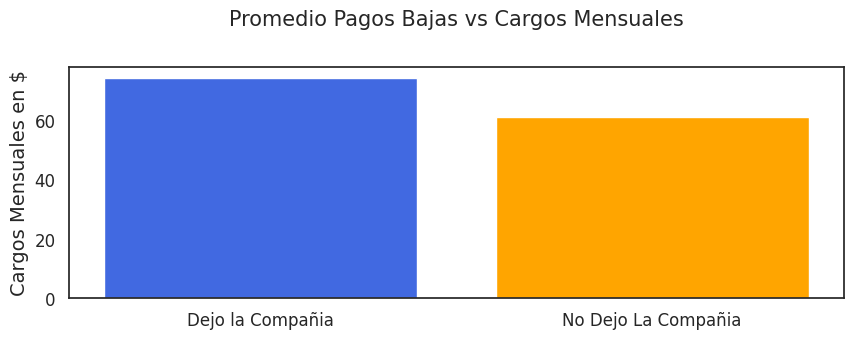

In [ ]:
# Plot del resultado
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(df_cargo_mensual['Fidelidad'], df_cargo_mensual['Total'], color=colores)
ax.set_title('Promedio Pagos Bajas vs Cargos Mensuales', loc='center', fontsize=15, pad=30)
ax.set_xlabel('')
ax.set_ylabel('Cargos Mensuales en $', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

### **Gastos Totales Personas Fidelizadas vs No Fidelizadas**

In [ ]:
# Inversion de clientes fidelizados vs no fidelizados
total_cargos_mesuales_out = datos_cargos_mensuales_out['Charges.Monthly'].sum()
total_cargos_mesuales_in = datos_cargos_mensuales_in['Charges.Monthly'].sum()

total_cargos_mesuales_out, total_cargos_mesuales_in

(np.float64(139130.85), np.float64(316985.75))

In [ ]:
# crear dataframe
total_mensual = {
    'Fidelidad': ['Dejo la Compañia', 'No Dejo La Compañia'],
    'Total': [total_cargos_mesuales_out, total_cargos_mesuales_in]
}
df_total_mensual = pd.DataFrame(total_mensual)
df_total_mensual

,Fidelidad,Total
0,Dejo la Compañia,139130.85
1,No Dejo La Compañia,316985.75


In [ ]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid',
           'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

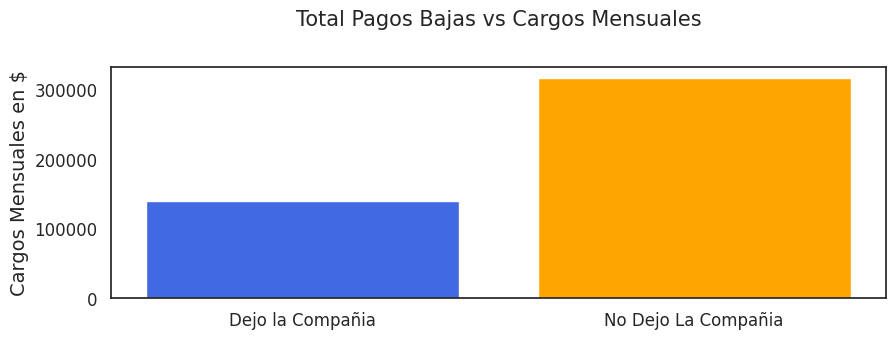

In [ ]:
# Plot del resultado
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(df_total_mensual['Fidelidad'], df_total_mensual['Total'], color=colores)
ax.set_title('Total Pagos Bajas vs Cargos Mensuales', loc='center', fontsize=15, pad=30)
ax.set_xlabel('')
ax.set_ylabel('Cargos Mensuales en $', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

## **5. Experiencia de Pago**

Se realizará un análisis para saber si los cobros por son adecuados o influyen en que los clientes dejen la empresa o no.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [ ]:
# extraemos las columnas que necesitamos para el análisis
datos_facturacion = datos[['Churn', 'PaymentMethod']]
datos_facturacion

,Churn,PaymentMethod
0,No,Mailed check
1,No,Mailed check
2,Yes,Electronic check
3,Yes,Electronic check
4,Yes,Mailed check
...,...,...
7262,No,Mailed check
7263,Yes,Electronic check
7264,No,Mailed check
7265,No,Mailed check


### **Experiencia Pago No Fidelizados**

In [ ]:
datos_experiencia_out = datos_facturacion[datos_facturacion['Churn'] == 'Yes']
datos_experiencia_out

,Churn,PaymentMethod
2,Yes,Electronic check
3,Yes,Electronic check
4,Yes,Mailed check
18,Yes,Credit card (automatic)
19,Yes,Electronic check
...,...,...
7243,Yes,Bank transfer (automatic)
7246,Yes,Electronic check
7260,Yes,Mailed check
7261,Yes,Bank transfer (automatic)


In [ ]:
# resetear indice DF de la gente que abandonó la compañía
datos_experiencia_out.reset_index(inplace=True, drop=True)
datos_experiencia_out

,Churn,PaymentMethod
0,Yes,Electronic check
1,Yes,Electronic check
2,Yes,Mailed check
3,Yes,Credit card (automatic)
4,Yes,Electronic check
...,...,...
1864,Yes,Bank transfer (automatic)
1865,Yes,Electronic check
1866,Yes,Mailed check
1867,Yes,Bank transfer (automatic)


In [ ]:
# Contar la frecuencia de cada valor en la columna 'Contract'
frecuencia_paymen_method = datos_experiencia_out['PaymentMethod'].value_counts()
frecuencia_paymen_method

,count
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


In [ ]:
frecuencia_paymen_method.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, Electronic check to Credit card (automatic)
Series name: count
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 236.0+ bytes


In [ ]:
frecuencia_paymen_method.index

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object', name='PaymentMethod')

In [ ]:
df_frecuencia_paymen_method = pd.DataFrame(frecuencia_paymen_method)
df_frecuencia_paymen_method.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Electronic check to Credit card (automatic)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   4 non-null      int64
dtypes: int64(1)
memory usage: 236.0+ bytes


In [ ]:
columnas_df_frecuencia_paymen_method = list(df_frecuencia_paymen_method.columns)
columnas_df_frecuencia_paymen_method

['count']

In [ ]:
df_frecuencia_paymen_method.rename(columns={'count': 'Total'}, inplace=True)

In [ ]:
df_frecuencia_paymen_method.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Electronic check to Credit card (automatic)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   4 non-null      int64
dtypes: int64(1)
memory usage: 236.0+ bytes


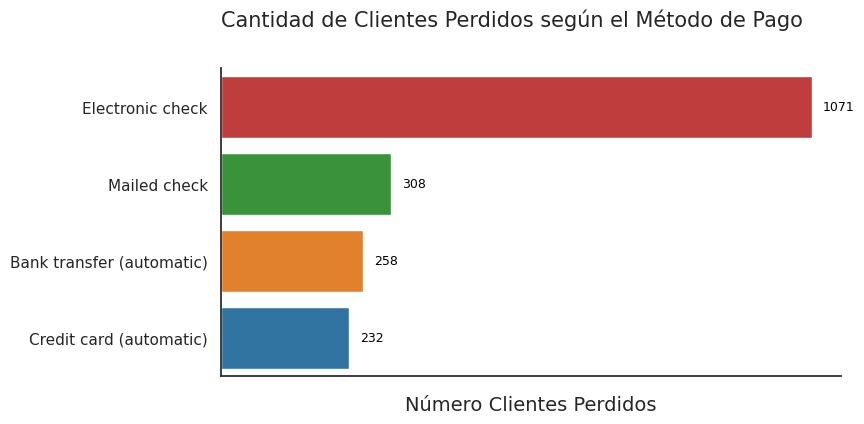

In [ ]:
def generar_grafico(palette):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xticklabels=[])
    # Graficar usando el DataFrame correcto
    ax = sns.barplot(data=df_frecuencia_paymen_method,
                     x=df_frecuencia_paymen_method['Total'],
                     y=df_frecuencia_paymen_method.index,
                     hue=df_frecuencia_paymen_method['Total'],
                     palette=palette,
                     orient='h',
                     legend=False)  # No se necesita hue aquí

    ax.set_title('Cantidad de Clientes Perdidos según el Método de Pago',
                 loc='left', fontsize=15, pad=30)
    ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
    ax.set_ylabel('')
    sns.despine()
    for i, j in enumerate(df_frecuencia_paymen_method['Total']):
        ax.text(j + 20, i, str(j), color='black', fontsize=9, ha='left', va='center')
    plt.show()
# Configurar el tema de Seaborn
sns.set_theme(style='white')
# Llamar a la función para generar el gráfico
generar_grafico('tab10')

### **Experiencia Pago Fidelizados**

In [ ]:
datos_experiencia_in = datos_facturacion[datos_facturacion['Churn'] == 'No']
datos_experiencia_in

,Churn,PaymentMethod
0,No,Mailed check
1,No,Mailed check
5,No,Credit card (automatic)
6,No,Bank transfer (automatic)
7,No,Credit card (automatic)
...,...,...
7259,No,Mailed check
7262,No,Mailed check
7264,No,Mailed check
7265,No,Mailed check


In [ ]:
# resetear indice DF de la gente que abandonó la compañía
datos_experiencia_in.reset_index(inplace=True, drop=True)
datos_experiencia_in

,Churn,PaymentMethod
0,No,Mailed check
1,No,Mailed check
2,No,Credit card (automatic)
3,No,Bank transfer (automatic)
4,No,Credit card (automatic)
...,...,...
5169,No,Mailed check
5170,No,Mailed check
5171,No,Mailed check
5172,No,Mailed check


In [ ]:
# Contar la frecuencia de cada valor en la columna 'Contract'
frecuencia_paymen_method_in = datos_experiencia_in['PaymentMethod'].value_counts()
frecuencia_paymen_method_in

,count
PaymentMethod,
Mailed check,1304
Electronic check,1294
Credit card (automatic),1290
Bank transfer (automatic),1286


In [ ]:
df_frecuencia_paymen_method_in = pd.DataFrame(frecuencia_paymen_method_in)
df_frecuencia_paymen_method_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Mailed check to Bank transfer (automatic)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   4 non-null      int64
dtypes: int64(1)
memory usage: 236.0+ bytes


In [ ]:
columnas_df_frecuencia_paymen_method_in = list(df_frecuencia_paymen_method_in.columns)
columnas_df_frecuencia_paymen_method_in

['count']

In [ ]:
df_frecuencia_paymen_method_in.rename(columns={'count': 'Total'}, inplace=True)

In [ ]:
df_frecuencia_paymen_method_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Mailed check to Bank transfer (automatic)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   4 non-null      int64
dtypes: int64(1)
memory usage: 236.0+ bytes


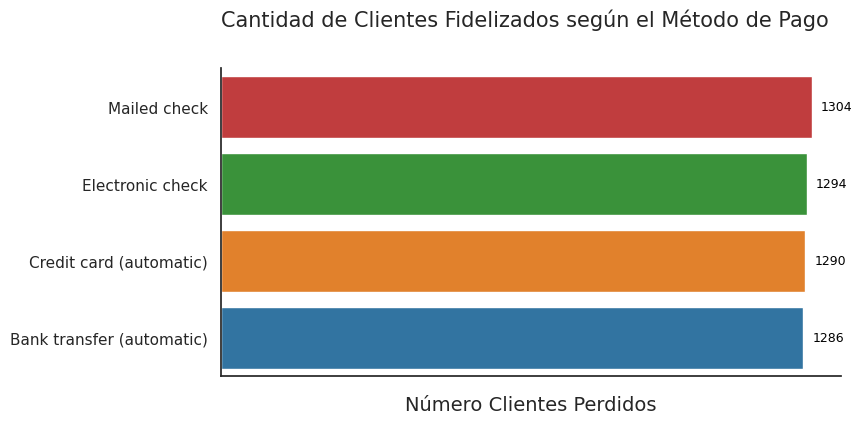

In [ ]:
def generar_grafico(palette):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xticklabels=[])
    # Graficar usando el DataFrame correcto
    ax = sns.barplot(data=df_frecuencia_paymen_method_in,
                     x=df_frecuencia_paymen_method_in['Total'],
                     y=df_frecuencia_paymen_method_in.index,
                     hue=df_frecuencia_paymen_method_in['Total'],
                     palette=palette,
                     orient='h',
                     legend=False)  # No se necesita hue aquí

    ax.set_title('Cantidad de Clientes Fidelizados según el Método de Pago',
                 loc='left', fontsize=15, pad=30)
    ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
    ax.set_ylabel('')
    sns.despine()
    for i, j in enumerate(df_frecuencia_paymen_method_in['Total']):
        ax.text(j + 20, i, str(j), color='black', fontsize=9, ha='left', va='center')
    plt.show()
# Configurar el tema de Seaborn
sns.set_theme(style='white')
# Llamar a la función para generar el gráfico
generar_grafico('tab10')

### **Análisis Combinado**

In [ ]:
# Combinar los dos DataFrames
df_pay_fid_vs_nofid = df_frecuencia_paymen_method_in
df_pay_fid_vs_nofid

,Total
PaymentMethod,
Mailed check,1304
Electronic check,1294
Credit card (automatic),1290
Bank transfer (automatic),1286


In [ ]:
# Renombrar columna Total
df_pay_fid_vs_nofid = df_pay_fid_vs_nofid.rename(columns={'Total': 'Fidelizados'})
df_pay_fid_vs_nofid

,Fidelizados
PaymentMethod,
Mailed check,1304
Electronic check,1294
Credit card (automatic),1290
Bank transfer (automatic),1286


In [ ]:
# agregar columna total No fidelizados
df_pay_fid_vs_nofid['No_Fidelizados'] = df_frecuencia_paymen_method['Total']
df_pay_fid_vs_nofid

,Fidelizados,No_Fidelizados
PaymentMethod,,
Mailed check,1304,308
Electronic check,1294,1071
Credit card (automatic),1290,232
Bank transfer (automatic),1286,258


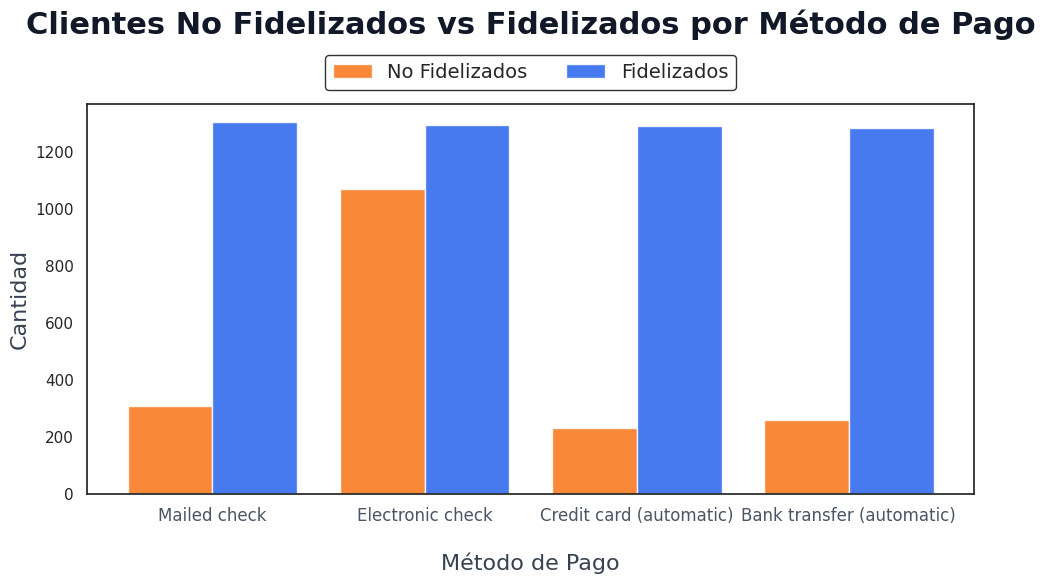

In [ ]:
# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
x = np.arange(len(df_pay_fid_vs_nofid.index))
bar_width = 0.4
color_no_fid = '#f97316'  # naranja suave
color_fid = '#2563eb'     # azul suave
# Crear las barras
bars_no_fid = ax.bar(x - bar_width/2, df_pay_fid_vs_nofid['No_Fidelizados'], width=bar_width,
                     label='No Fidelizados', color=color_no_fid, alpha=0.85)
bars_fid = ax.bar(x + bar_width/2, df_pay_fid_vs_nofid['Fidelizados'], width=bar_width,
                  label='Fidelizados', color=color_fid, alpha=0.85)
# Títulos y etiquetas
ax.set_title('Clientes No Fidelizados vs Fidelizados por Método de Pago', fontsize=22, weight='bold', color='#111827', pad=50)
ax.set_xlabel('Método de Pago', fontsize=16, color='#374151', labelpad=20)
ax.set_ylabel('Cantidad', fontsize=16, color='#374151')
# Etiquetas eje X
ax.set_xticks(x)
ax.set_xticklabels(df_pay_fid_vs_nofid.index, fontsize=12, color='#4b5563')
# Leyenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=14, frameon=True, facecolor='white', edgecolor='black', ncol=2)
fig.subplots_adjust(top=0.8)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

## **6. Análisis por Género**

Se realizará un análisis para saber si las mujeres o los hombres son más propensos a dejar la compañía.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [ ]:
# extraemos las columnas que necesitamos para el análisis
datos_genero = datos[['Churn', 'gender']]
datos_genero

,Churn,gender
0,No,Female
1,No,Male
2,Yes,Male
3,Yes,Male
4,Yes,Female
...,...,...
7262,No,Female
7263,Yes,Male
7264,No,Male
7265,No,Male


### **No Fidelizados por Genero**

In [ ]:
datos_genero_out = datos_genero[datos_facturacion['Churn'] == 'Yes']
datos_genero_out

,Churn,gender
2,Yes,Male
3,Yes,Male
4,Yes,Female
18,Yes,Male
19,Yes,Male
...,...,...
7243,Yes,Male
7246,Yes,Male
7260,Yes,Female
7261,Yes,Female


In [ ]:
# resetear indice DF de la gente que abandonó la compañía
datos_genero_out.reset_index(inplace=True, drop=True)
datos_genero_out

,Churn,gender
0,Yes,Male
1,Yes,Male
2,Yes,Female
3,Yes,Male
4,Yes,Male
...,...,...
1864,Yes,Male
1865,Yes,Male
1866,Yes,Female
1867,Yes,Female


In [ ]:
# Contar la frecuencia de cada valor en la columna 'Contract'
frecuencia_datos_genero_out = datos_genero_out['gender'].value_counts()
frecuencia_datos_genero_out

,count
gender,
Female,939
Male,930


In [ ]:
# convertir a DF
df_frecuencia_datos_genero_out = pd.DataFrame(frecuencia_datos_genero_out)
df_frecuencia_datos_genero_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Female to Male
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   2 non-null      int64
dtypes: int64(1)
memory usage: 140.0+ bytes


In [ ]:
columnas_df_frecuencia_datos_genero_out = list(df_frecuencia_datos_genero_out.columns)
columnas_df_frecuencia_datos_genero_out

['count']

In [ ]:
df_frecuencia_datos_genero_out.rename(columns={'count': 'Total'}, inplace=True)

In [ ]:
df_frecuencia_datos_genero_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Female to Male
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   2 non-null      int64
dtypes: int64(1)
memory usage: 140.0+ bytes


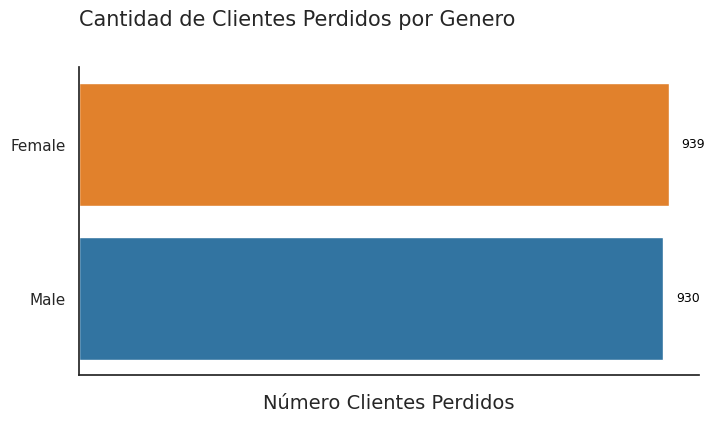

In [ ]:
def generar_grafico(palette):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xticklabels=[])
    # Graficar usando el DataFrame correcto
    ax = sns.barplot(data=df_frecuencia_datos_genero_out,
                     x=df_frecuencia_datos_genero_out['Total'],
                     y=df_frecuencia_datos_genero_out.index,
                     hue=df_frecuencia_datos_genero_out['Total'],
                     palette=palette,
                     orient='h',
                     legend=False)  # No se necesita hue aquí

    ax.set_title('Cantidad de Clientes Perdidos por Genero',
                 loc='left', fontsize=15, pad=30)
    ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
    ax.set_ylabel('')
    sns.despine()
    for i, j in enumerate(df_frecuencia_datos_genero_out['Total']):
        ax.text(j + 20, i, str(j), color='black', fontsize=9, ha='left', va='center')
    plt.show()
# Configurar el tema de Seaborn
sns.set_theme(style='white')
# Llamar a la función para generar el gráfico
generar_grafico('tab10')

### **Fidelizados Por Genero**

In [ ]:
datos_genero_in = datos_genero[datos_facturacion['Churn'] == 'No']
datos_genero_in

,Churn,gender
0,No,Female
1,No,Male
5,No,Female
6,No,Female
7,No,Male
...,...,...
7259,No,Female
7262,No,Female
7264,No,Male
7265,No,Male


In [ ]:
# resetear indice DF de la gente que abandonó la compañía
datos_genero_in.reset_index(inplace=True, drop=True)
datos_genero_in

,Churn,gender
0,No,Female
1,No,Male
2,No,Female
3,No,Female
4,No,Male
...,...,...
5169,No,Female
5170,No,Female
5171,No,Male
5172,No,Male


In [ ]:
# Contar la frecuencia de cada valor en la columna 'gender'
frecuencia_datos_genero_in = datos_genero_in['gender'].value_counts()
frecuencia_datos_genero_in

,count
gender,
Male,2625
Female,2549


In [ ]:
# crear dataframe
df_frecuencia_datos_genero_in = pd.DataFrame(frecuencia_datos_genero_in)
df_frecuencia_datos_genero_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Male to Female
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   2 non-null      int64
dtypes: int64(1)
memory usage: 140.0+ bytes


In [ ]:
columnas_df_frecuencia_datos_genero_in = list(df_frecuencia_datos_genero_in.columns)
columnas_df_frecuencia_datos_genero_in

['count']

In [ ]:
df_frecuencia_datos_genero_in.rename(columns={'count': 'Total'}, inplace=True)

In [ ]:
df_frecuencia_datos_genero_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Male to Female
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   2 non-null      int64
dtypes: int64(1)
memory usage: 140.0+ bytes


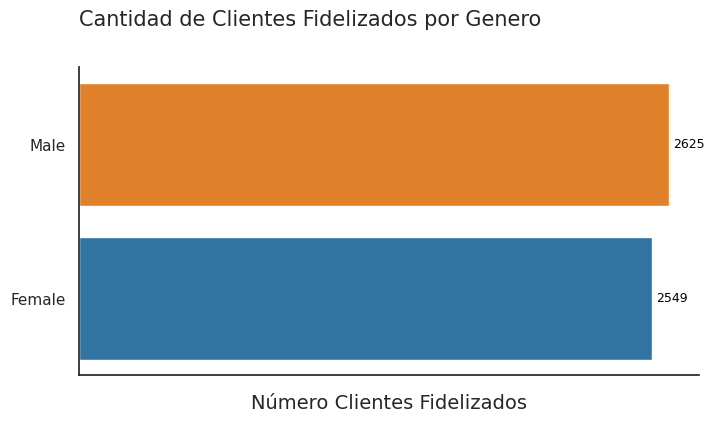

In [ ]:
def generar_grafico(palette):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xticklabels=[])
    # Graficar usando el DataFrame correcto
    ax = sns.barplot(data=df_frecuencia_datos_genero_in,
                     x=df_frecuencia_datos_genero_in['Total'],
                     y=df_frecuencia_datos_genero_in.index,
                     hue=df_frecuencia_datos_genero_in['Total'],
                     palette=palette,
                     orient='h',
                     legend=False)  # No se necesita hue aquí

    ax.set_title('Cantidad de Clientes Fidelizados por Genero',
                 loc='left', fontsize=15, pad=30)
    ax.set_xlabel('Número Clientes Fidelizados', fontsize=14)
    ax.set_ylabel('')
    sns.despine()
    for i, j in enumerate(df_frecuencia_datos_genero_in['Total']):
        ax.text(j + 20, i, str(j), color='black', fontsize=9, ha='left', va='center')
    plt.show()
# Configurar el tema de Seaborn
sns.set_theme(style='white')
# Llamar a la función para generar el gráfico
generar_grafico('tab10')

### **Análisis Combinado**

In [ ]:
# Combinar los dos DataFrames
df_gen_fid_vs_nofid = df_frecuencia_datos_genero_in
df_gen_fid_vs_nofid

,Total
gender,
Male,2625
Female,2549


In [ ]:
# Renombrar columna Total
df_gen_fid_vs_nofid = df_gen_fid_vs_nofid.rename(columns={'Total': 'Fidelizados'})
df_gen_fid_vs_nofid

,Fidelizados
gender,
Male,2625
Female,2549


In [ ]:
# agregar columna total No fidelizados
df_gen_fid_vs_nofid['No_Fidelizados'] = df_frecuencia_datos_genero_out['Total']
df_gen_fid_vs_nofid

,Fidelizados,No_Fidelizados
gender,,
Male,2625,930
Female,2549,939


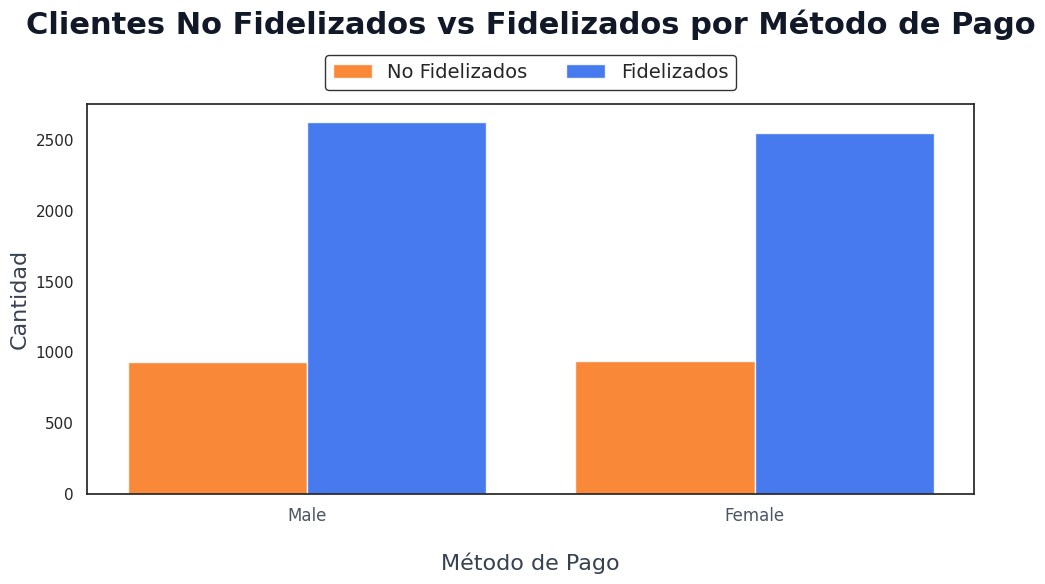

In [ ]:
# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
x = np.arange(len(df_gen_fid_vs_nofid.index))
bar_width = 0.4
color_no_fid = '#f97316'  # naranja suave
color_fid = '#2563eb'     # azul suave
# Crear las barras
bars_no_fid = ax.bar(x - bar_width/2, df_gen_fid_vs_nofid['No_Fidelizados'], width=bar_width,
                     label='No Fidelizados', color=color_no_fid, alpha=0.85)
bars_fid = ax.bar(x + bar_width/2, df_gen_fid_vs_nofid['Fidelizados'], width=bar_width,
                  label='Fidelizados', color=color_fid, alpha=0.85)
# Títulos y etiquetas
ax.set_title('Clientes No Fidelizados vs Fidelizados por Método de Pago', fontsize=22, weight='bold', color='#111827', pad=50)
ax.set_xlabel('Método de Pago', fontsize=16, color='#374151', labelpad=20)
ax.set_ylabel('Cantidad', fontsize=16, color='#374151')
# Etiquetas eje X
ax.set_xticks(x)
ax.set_xticklabels(df_gen_fid_vs_nofid.index, fontsize=12, color='#4b5563')
# Leyenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=14, frameon=True, facecolor='white', edgecolor='black', ncol=2)
fig.subplots_adjust(top=0.8)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

#📄INFORME FINAL

---




## **Introducción**

Telecom X enfrenta actualmente un alto nivel de abandono de clientes **(churn)**, lo que impacta directamente en su competitividad y proyección de crecimiento. Con el objetivo de comprender las causas de este fenómeno, se han puesto a disposición datos relevantes que, tras un riguroso proceso de tratamiento y análisis exploratorio, permitirán identificar los factores clave que inciden en la pérdida de clientes. Estos hallazgos servirán como insumo para la construcción de modelos predictivos que orienten decisiones estratégicas, enfocadas en reducir la evasión y fortalecer la lealtad de la base de usuarios.

##  **Limpieza y Tratamiento de Datos**



### 🔹 Extracción de Datos  
El proceso comenzó con la conexión a **Google Drive**, donde se encontraban almacenados los archivos proporcionados por el cliente. A partir de dicha conexión, se importaron los datos desde un archivo en formato **JSON** utilizando la función `pd.read_json(path)`.  

### 🔹 Tratamiento de Datos  
Una vez cargada la información, se realizó un proceso de **normalización** en columnas clave (*Customer*, *Phone*, *Internet* y *Account*). Esto permitió estandarizar la información, generar variables adicionales y actualizar el **DataFrame** para obtener un mayor nivel de detalle en el análisis.  

- **Estructura inicial del DataFrame:**  
  `['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']`  

- **Estructura final del DataFrame tratado:**  
  `['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']`  


## **Análisis Exploratorio de Datos**

Del total de **7,268 clientes** analizados, el objetivo fue determinar los factores más relevantes que inciden en la decisión de permanecer en la compañía o abandonarla. Para ello, se identificaron variables críticas que permiten comprender de manera integral el fenómeno de **evasión de clientes (churn)**.  



### **Los principales ejes de análisis fueron los siguientes:**



## 📊 Evasión Total de Clientes  

Este análisis inicial tuvo como propósito **cuantificar la proporción de clientes que permanecen activos frente a aquellos que han abandonado la compañía**, así como identificar los casos sin información disponible.  

### 🔹 Resultados  

- **Clientes fidelizados (activos):** **5,174**  
- **Clientes que abandonaron la compañía:** **1,869**  
- **Clientes sin información:** **224**  

### 🔍 Conclusión:
Los resultados evidencian que, si bien la mayoría de los clientes se mantiene activa (**71.2%**), existe un porcentaje significativo de evasión (**25.7%**) que representa una amenaza directa para la sostenibilidad del negocio. Adicionalmente, la presencia de clientes sin información (**3.1%**) plantea la necesidad de mejorar los procesos de captura y gestión de datos.  

Este diagnóstico confirma la relevancia de avanzar hacia un análisis más profundo de las causas de **churn**, con el fin de diseñar estrategias de retención efectivas que fortalezcan la lealtad de la base de clientes.  


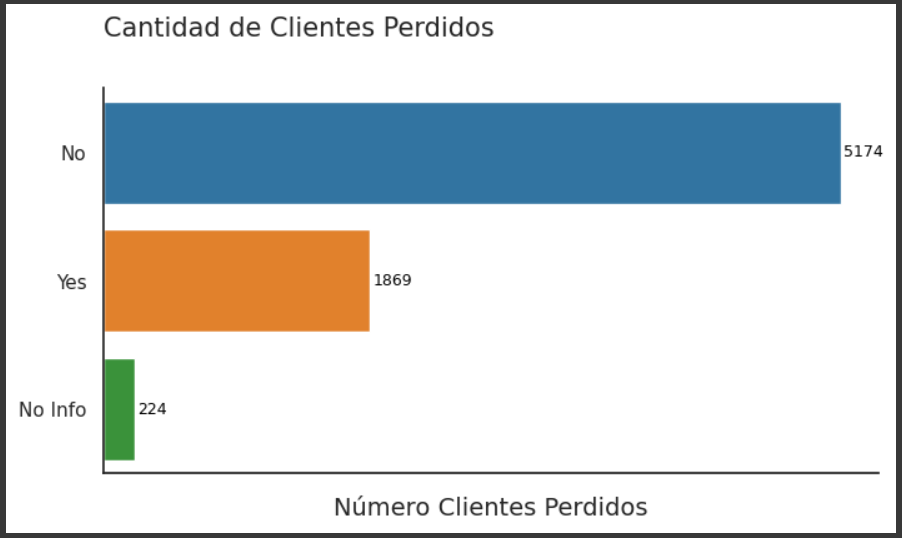

## 📑 Contratos y Fidelización

El análisis de los distintos tipos de contratos permitió evaluar su impacto en la **permanencia y fidelidad de los clientes**. Los resultados evidencian que la modalidad de contratación constituye un factor determinante en la tasa de evasión.  

### Resultados por tipo de contrato

- **🔹 Contrato Month-to-Month**  
  - No fidelizados: **1,655**  
  - Fidelizados: **2,220**  
  Este tipo de contrato concentra la mayor proporción de clientes no fidelizados, lo que refleja una mayor vulnerabilidad a la deserción.  

- **🔹 Contrato One Year**  
  - No fidelizados: **166**  
  - Fidelizados: **1,307**  
  Presenta un mejor desempeño en términos de fidelización respecto al contrato mensual, evidenciando que el compromiso de mediano plazo reduce el riesgo de evasión.  

- **🔹 Contrato Two Year**  
  - No fidelizados: **48**  
  - Fidelizados: **1,647**  
  Es la modalidad con mayor grado de fidelización, lo que confirma que los contratos de largo plazo generan un vínculo más estable y duradero con la compañía.  

### 🔍 Conclusión:
Los resultados indican una clara relación entre la duración del contrato y la **tasa de fidelización**: a mayor compromiso temporal, mayor estabilidad en la base de clientes. Esto resalta la importancia de incentivar modalidades contractuales de mayor plazo como estrategia para reducir la evasión (*churn*).  



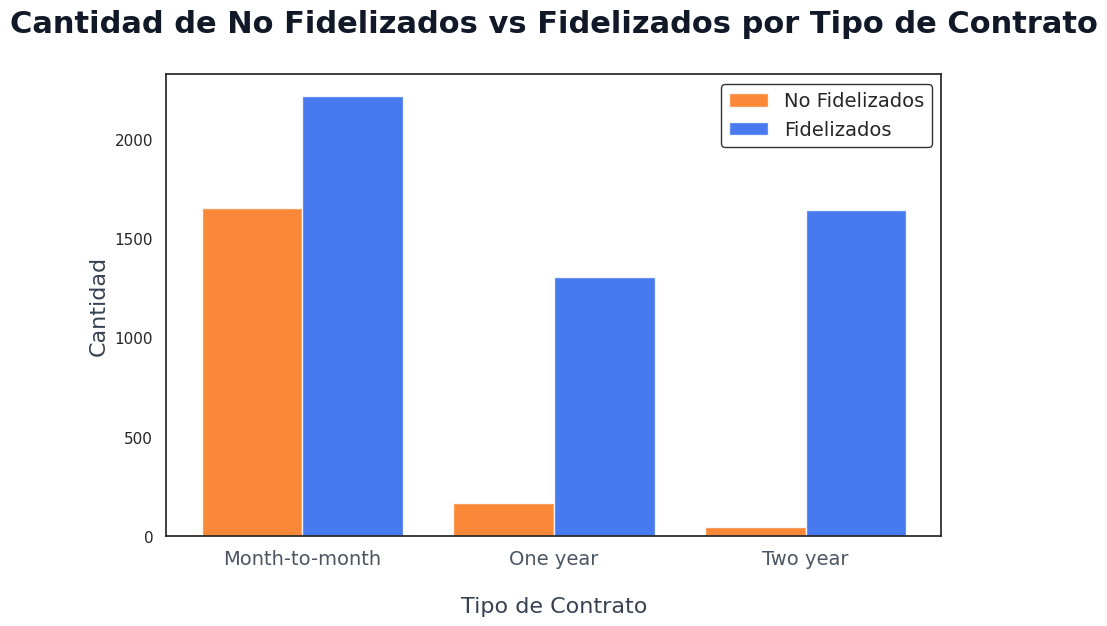

## 🛠️ Soporte Técnico y Fidelización

Este análisis evaluó el impacto de contar o no con **servicio de soporte técnico** en la fidelización de clientes, considerando los distintos tipos de servicio contratados. Los resultados evidencian diferencias significativas en la permanencia según la disponibilidad de soporte.  

### Resultados por tipo de servicio

- **🔹 Fiber Optic (Sin Soporte)**  
  - No fidelizados: **1,101**  
  - Fidelizados: **1,129**  
  Muestra un alto nivel de clientes no fidelizados, reflejando la importancia de ofrecer soporte en este segmento.  

- **🔹 Fiber Optic (Con Soporte)**  
  - No fidelizados: **196**  
  - Fidelizados: **670**  
  La proporción de clientes fidelizados mejora considerablemente cuando se dispone de soporte técnico.  

- **🔹 DSL (Sin Soporte)**  
  - No fidelizados: **345**  
  - Fidelizados: **898**  
  Aunque existe un mayor número de clientes fidelizados, la ausencia de soporte mantiene un nivel de riesgo relevante.  

- **🔹 DSL (Con Soporte)**  
  - No fidelizados: **114**  
  - Fidelizados: **1,064**  
  Es el escenario más favorable, con la mayor proporción de clientes fidelizados dentro de los servicios DSL.  

- **🔹 Sin Servicio**  
  Corresponde a clientes que no cuentan con servicio asociado, por lo que no aplica el análisis de soporte técnico.  

### 🔍 Conclusión:  
Los resultados confirman que la **disponibilidad de soporte técnico es un factor clave en la retención de clientes**. En particular, los servicios de **DSL con soporte** presentan los niveles más altos de fidelización, mientras que la ausencia de soporte en **Fiber Optic** se asocia a mayores tasas de evasión. Invertir en mejorar y garantizar la calidad del soporte técnico se perfila como una estrategia esencial para reducir el *churn*.  


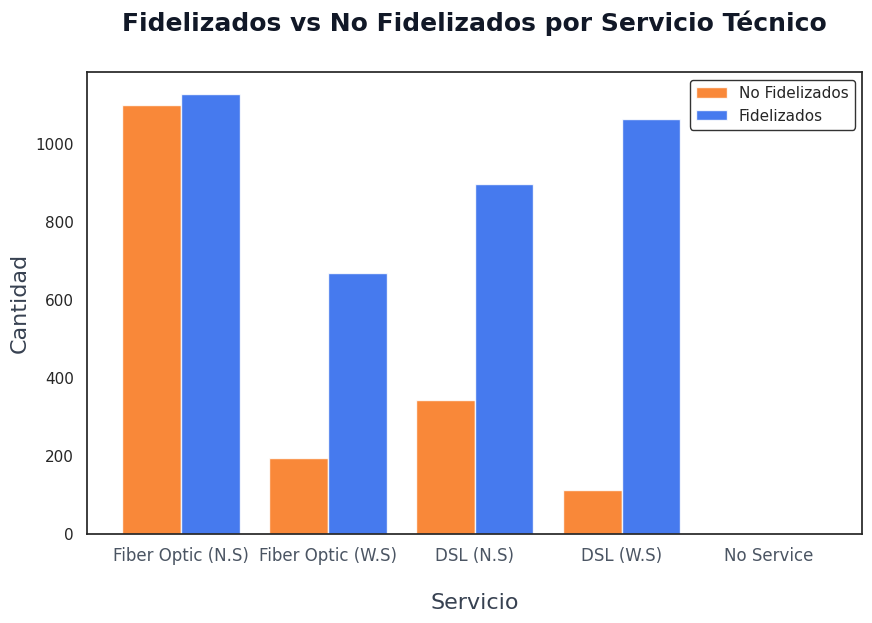

## 💰 Cargos Mensuales y Fidelización

El presente análisis evaluó el impacto del **factor económico** en la fidelidad de los clientes, considerando tanto los **gastos promedios** como los **gastos totales** de quienes permanecieron en la compañía frente a quienes la abandonaron.  

### 🔹 Gastos Promedios: Clientes Fidelizados vs. No Fidelizados  
Los resultados muestran una diferencia significativa en el gasto mensual promedio:  

- **Clientes que abandonaron la compañía:**  
  Promedio mensual de **$74.441**  

- **Clientes que permanecieron en la compañía:**  
  Promedio mensual de **$61.265**  

### 🔍 Conclusión:  
Los clientes que abandonan la compañía presentan un gasto mensual promedio considerablemente **superior** al de aquellos que permanecen. Esto sugiere que los clientes con **mayores cargos mensuales** son más sensibles al costo y, por ende, tienen un mayor riesgo de evasión (*churn*).  

Una estrategia orientada a este segmento podría incluir:  
- Planes más competitivos para clientes de alto consumo.  
- Beneficios o descuentos escalonados según nivel de gasto.  
- Programas de fidelización diseñados para clientes de mayor valor.  


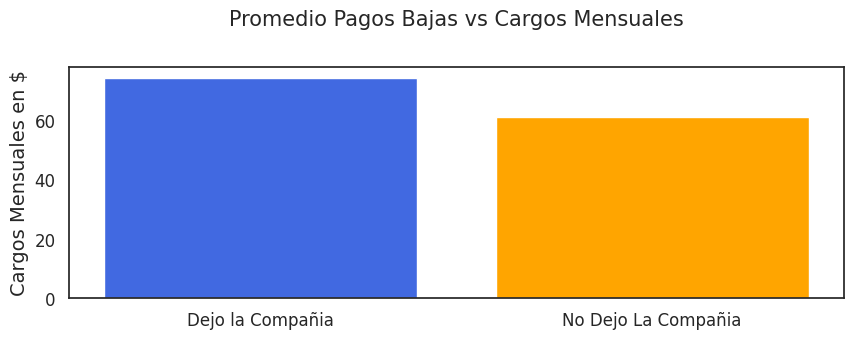

## 💵 Gastos Totales: Clientes Fidelizados vs. No Fidelizados  

El análisis de los **gastos totales** permite dimensionar el impacto económico asociado a la evasión de clientes, diferenciando entre quienes permanecieron en la compañía y quienes la abandonaron.  

### 🔹 Resultados  
- **Clientes que abandonaron la compañía:**  
  Gasto total mensual de **$139.130,85**  

- **Clientes que permanecieron en la compañía:**  
  Gasto total mensual de **$316.985,75**  

### 🔍 Conclusión:  
A pesar de que los clientes que abandonan presentan un gasto promedio mensual mayor, el **gasto total acumulado** de los clientes fidelizados es **considerablemente superior**. Esto refleja que la retención de clientes no solo disminuye el índice de evasión, sino que también representa un **mayor valor económico sostenido en el tiempo** para la compañía.  

Fortalecer estrategias de fidelización resulta clave para asegurar ingresos estables y maximizar el valor de la base de clientes.  


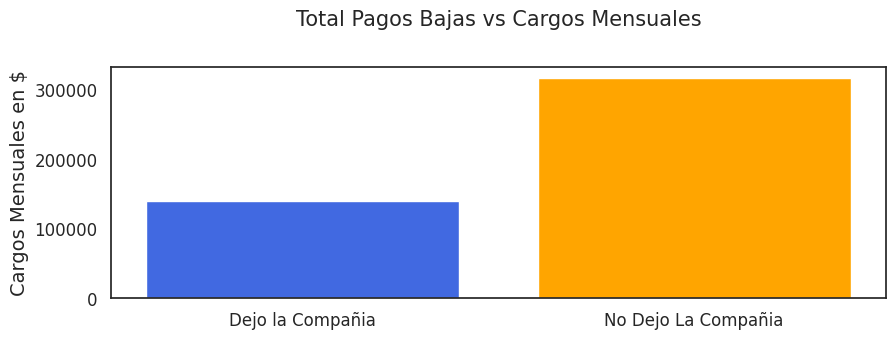

## 💳 Experiencia de Pago y Fidelización  

Este análisis evaluó el impacto de los **métodos de pago** sobre la fidelidad de los clientes, considerando su influencia en la decisión de permanecer o abandonar la compañía.  

### 🔹 Resultados por método de pago  

- **Mailed Check (Cheque por Correo)**  
  - No fidelizados: **308**  
  - Fidelizados: **1,304**  
  Presenta una buena proporción de clientes fidelizados, aunque su uso es menos representativo en comparación con los métodos automáticos.  

- **Electronic Check (Cheque Electrónico)**  
  - No fidelizados: **1,071**  
  - Fidelizados: **1,294**  
  Es el método con mayor número de clientes no fidelizados, lo que sugiere que este canal presenta una experiencia menos satisfactoria para el usuario.  

- **Credit Card (Automático)**  
  - No fidelizados: **232**  
  - Fidelizados: **1,290**  
  Refleja un alto nivel de fidelización, evidenciando que los pagos automáticos mediante tarjeta generan mayor comodidad y estabilidad.  

- **Bank Transfer (Automático)**  
  - No fidelizados: **258**  
  - Fidelizados: **1,286**  
  Al igual que la tarjeta de crédito, los pagos automáticos vía transferencia bancaria muestran una alta tasa de fidelización.  

### 🔍 Conclusión:  
Los resultados evidencian que los **métodos de pago automáticos** (tarjeta de crédito y transferencia bancaria) están asociados con **mayores niveles de fidelización**, mientras que el **cheque electrónico** presenta la mayor proporción de clientes no fidelizados.  

Esto sugiere que facilitar medios de pago automáticos y confiables puede ser una estrategia clave para **mejorar la experiencia del cliente, reducir el churn y asegurar ingresos recurrentes**.  


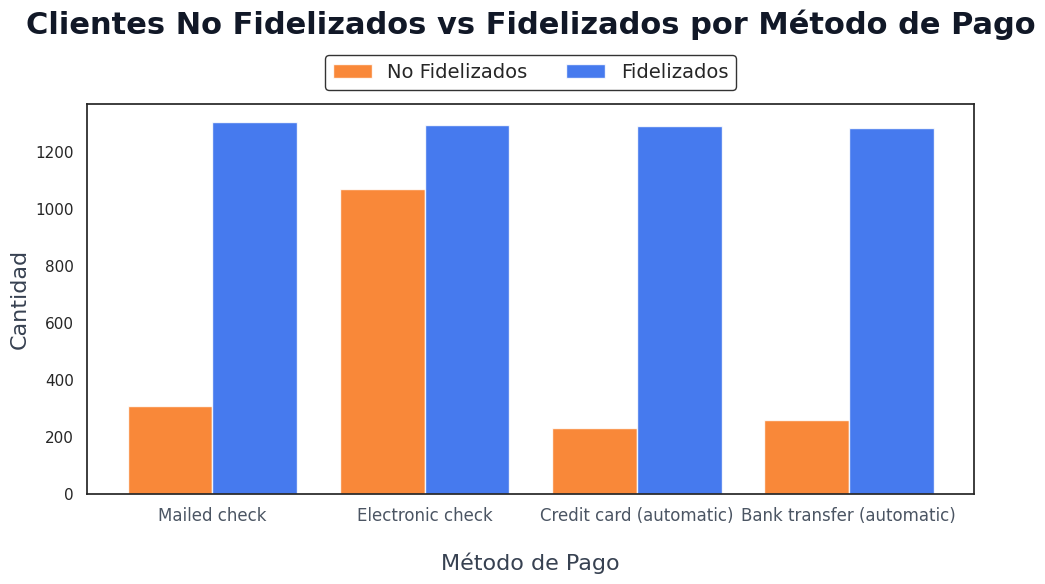

## 👥 Análisis por Género y Fidelización  

Este análisis tuvo como objetivo evaluar si el **género** constituye un factor determinante en la fidelización de clientes o en la probabilidad de evasión (*churn*).  

### 🔹 Resultados  

- **Male (Hombres)**  
  - No fidelizados: **930**  
  - Fidelizados: **2,625**  

- **Female (Mujeres)**  
  - No fidelizados: **939**  
  - Fidelizados: **2,549**  

### 🔍 Conclusión:  
Los resultados muestran que **no existen diferencias significativas entre hombres y mujeres en términos de fidelización**. Ambos grupos presentan proporciones similares de clientes fidelizados y no fidelizados, lo que indica que el **género no es un factor crítico** en la explicación del churn dentro de la compañía.  

La atención debería centrarse, por tanto, en otros factores con mayor peso explicativo, como el **tipo de contrato, soporte técnico, cargos mensuales y métodos de pago**.  


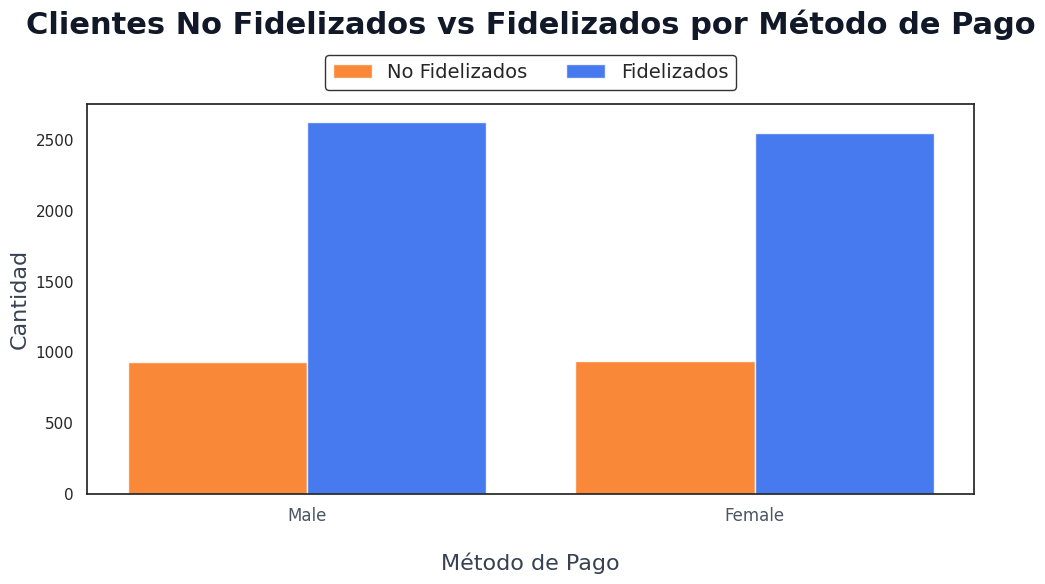

## 🎯 Recomendaciones Estratégicas  

A partir del análisis de los datos, se identifican oportunidades clave para **reducir la evasión de clientes (churn)** y fortalecer la fidelización en Telecom X. Las principales recomendaciones son:  

### 1. Optimización de Contratos y Retención  
- **Incentivar contratos de mayor duración** (1 y 2 años) mediante beneficios adicionales, descuentos progresivos o programas de lealtad.  
- **Reducir la dependencia de contratos "Month-to-Month"**, ya que presentan la mayor tasa de deserción.  

### 2. Fortalecimiento del Soporte Técnico  
- **Priorizar la mejora del servicio de soporte técnico**, en especial para clientes de **Fiber Optic**, segmento donde la falta de soporte está altamente asociada al churn.  
- Implementar canales de atención **más rápidos y personalizados** (chatbots inteligentes, soporte 24/7, seguimiento post-atención).  

### 3. Estrategias de Precios y Segmentación  
- Diseñar **planes diferenciados para clientes de alto gasto mensual**, quienes muestran mayor propensión a abandonar la compañía.  
- Ofrecer **bonificaciones o beneficios escalonados** para clientes con cargos elevados, como descuentos por consumo o paquetes adicionales de valor agregado.  

### 4. Optimización de la Experiencia de Pago  
- **Promover el uso de métodos de pago automáticos** (tarjeta de crédito y transferencia bancaria), que presentan los mayores niveles de fidelización.  
- Desincentivar gradualmente el uso de **electronic check**, asociado a las mayores tasas de evasión.  

### 5. Gestión de Datos y Seguimiento  
- Reducir la proporción de clientes sin información mediante **mejores prácticas de captura y actualización de datos**.  
- Establecer un **sistema de monitoreo proactivo** que identifique patrones de riesgo de evasión en tiempo real (alertas tempranas).  

---

## 🔍 Conclusión:  
Los resultados del análisis confirman que la evasión de clientes está fuertemente asociada a factores **contractuales, de soporte técnico, de precio y de experiencia de pago**, mientras que variables como el género presentan un impacto marginal.  

La aplicación de estas recomendaciones permitirá a Telecom X **reducir significativamente el churn, incrementar la satisfacción del cliente y asegurar la estabilidad de sus ingresos a largo plazo**.  
